In [7]:
import prince
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리
from sklearn.decomposition import PCA 
from scipy.stats import ks_2samp
from itertools import combinations

In [10]:
#data = pd.read_csv('Data/eq2015_modify_category.csv')
data = pd.read_csv('Data/train_test/train.csv')
# 지진이후 거 정리
drop_col = ['height_ft_post_eq','damage_level', 'floors_change','height_change']
tar_col = ['damage_level']
data2 = data.drop(drop_col, axis=1) 

quanti_var = [ 'age_building', 'plinth_area_sq_ft', 'height_ft_pre_eq', 'distance']
quali_var = data2.drop(quanti_var,axis=1).columns

# 양적 데이터 추출 및 표준화
quanti_data = data2[quanti_var]
scaler = StandardScaler()
quanti_data_scaled = pd.DataFrame(scaler.fit_transform(quanti_data),columns=quanti_var,index=data2['building_id'])

# 명목형 데이터 더미 화
#quali_data = pd.get_dummies(data2[quali_var])
quali_data = data2[quali_var]
quali_data.set_index('building_id',inplace=True)

# 양적 데이터와 명목형 데이터 결합
combined_data = pd.concat([quanti_data_scaled,quali_data], axis=1)
combined_data = combined_data.reset_index().drop('building_id',axis=1)

In [13]:
combined_data = combined_data.drop('Unnamed: 0',axis=1)

In [14]:
combined_data.head()

,age_building,plinth_area_sq_ft,height_ft_pre_eq,distance,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,superstructure
0,-0.014161,-0.285464,-0.040218,-0.233824,Slope,BCO,BT_L/H,g_Mud,"T/B,P",Not attached,Rectangular,s_Other
1,-0.557858,0.271455,0.156285,-1.412229,Flat,f_Mud,BT_L/H,g_Mud,"T/B,P",Not attached,Rectangular,s_origin
2,-0.849522,-0.427697,-1.274758,-1.279420,Flat,f_Mud,BT_L/H,g_Mud,Not applicable,Not attached,Rectangular,s_origin
3,-1.362963,0.867699,0.514905,1.079370,Slope,f_Mud,BT_L/H,g_Mud,"T/B,P",Not attached,Rectangular,s_origin
4,-0.746443,0.912141,0.514905,1.214590,Flat,f_Mud,BT_L/H,g_Mud,"T/B,P",Not attached,Rectangular,s_origin


c:\Users\49228\anaconda3\envs\multilayer\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.7289826554226332, -0.4101390849302367, -1.8166921090557846, -0.6053777258508409, -0.6238706091237891, -1.8011949567204482, -1.8205071843253475, -0.8281024041867012, -0.7920179126025282, -1.789662808229471, -0.4120857422393279, -1.9591024645894546, -0.40238977775227425, -0.9090802664882449, -1.781452516650854, -1.9407794111726662, -0.4830893055825998, -0.9399006463663984, -1.7653857297939242]'. Picking the first and converting the rest.
  X = self.scaler_.transform(X.to_numpy())
c:\Users\49228\anaconda3\envs\multilayer\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.7289826554226332, -0.4101390849302367, -1.8166921090557846, -0.6053777258508409, -0.6238706091237891, -1.8011949567204482, -1.8205071843253475, -0.8281024041867012, -0.7920179126025282, -1.789662808229

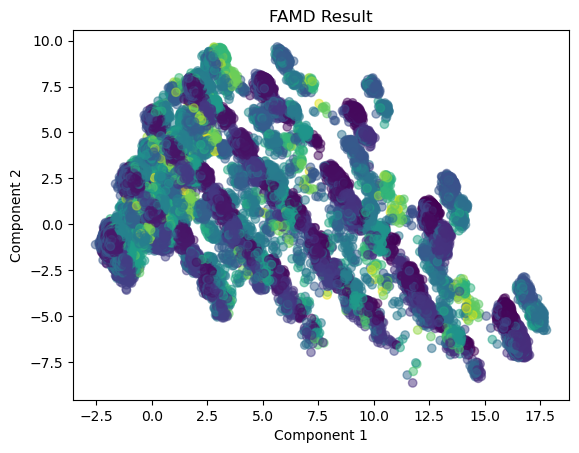

In [15]:
# FAMD 모델 초기화
famd = prince.FAMD(n_components=5, random_state=42)

# 데이터에 적합 및 변환
famd = famd.fit(combined_data)
df_famd = famd.transform(combined_data)

plt.scatter(df_famd[0], df_famd[1], c=df_famd[2], marker='o',alpha=0.5)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('FAMD Result')
plt.show()
